In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

data1 = pd.read_csv('input/Accidents0515.csv')
data2 = pd.read_csv('input/Casualties0515.csv')
data3 = pd.read_csv('input/Vehicles0515.csv')
data = pd.merge(data1,data2,on='Accident_Index')

In [2]:
print(data1.shape)
print(data2.shape)
print(data3.shape)
print(data.shape)

(1780653, 32)
(1048575, 15)
(1048575, 22)
(679971, 46)


In [3]:
final_data = pd.merge(data,data3,on='Accident_Index')
final_data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,1,15,2,74,10,-1,-1,-1,7,1
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,1,1,1,42,7,8268,2,3,-1,-1
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,1,1,1,35,6,8300,2,5,2,1
3,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,1,15,1,62,9,1762,1,6,1,1
4,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,1,15,2,49,8,1769,1,4,2,1


In [4]:
print(data.shape)
print(final_data.shape)

(679971, 46)
(961906, 67)


<b>Casuality Severity & Number of Casualities -> Response Variables</b>

In [5]:
fd = final_data[final_data.T[final_data.dtypes!=np.object].index]
fd = fd.dropna()

In [6]:
y1 = pd.cut(fd['Number_of_Casualties'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 100 ], labels=np.array('1 2 3 4 5 6 7 8 9 >9'.split()))
X = fd
del X['Number_of_Casualties']

X.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Day_of_Week,Local_Authority_(District),1st_Road_Class,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,525680.0,178240.0,-0.191170,51.489096,1,2,1,3,12,3,...,1,15,2,74,10,-1,-1,-1,7,1
1,524170.0,181650.0,-0.211708,51.520075,1,3,1,4,12,4,...,1,1,1,42,7,8268,2,3,-1,-1
2,524520.0,182240.0,-0.206458,51.525301,1,3,2,5,12,5,...,1,1,1,35,6,8300,2,5,2,1
3,524520.0,182240.0,-0.206458,51.525301,1,3,2,5,12,5,...,1,15,1,62,9,1762,1,6,1,1
4,526900.0,177530.0,-0.173862,51.482442,1,3,1,6,12,3,...,1,15,2,49,8,1769,1,4,2,1


<b>Plot Frequencies of Number_Of_Casualties</b>

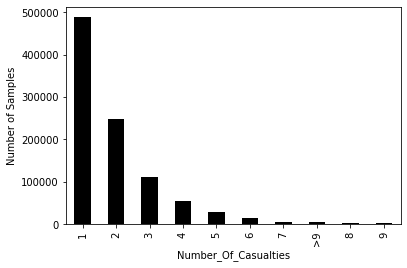

In [7]:
import matplotlib.pyplot as plt
import pandas

fig, ax = plt.subplots()
y1.value_counts().plot(ax=ax, kind='bar', color='black')
plt.xlabel('Number_Of_Casualties')
plt.ylabel('Number of Samples')
plt.show()

<b>Selecting Features</b>

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.10, random_state=42)
print(X_train.shape)

(865593, 61)


In [9]:
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import LogisticRegression

select = SelectPercentile(percentile=50)
select.fit(X, y1)
X_selected = select.transform(X)

print('X.shape is: {}'.format(X.shape))
print('X_selected.shape is: {}'.format(X_selected.shape))

C:\Users\HP\Anaconda\envs\MachineLearning\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [37] are constant.
  UserWarning)
C:\Users\HP\Anaconda\envs\MachineLearning\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


X.shape is: (961770, 61)
X_selected.shape is: (961770, 30)


[ True  True  True  True False  True  True False False  True False False
  True False  True  True False False False  True False  True False False
  True  True  True  True  True  True False False False  True  True  True
  True False  True False  True False False False False  True False False
 False False False False False False  True  True  True  True False False
  True]


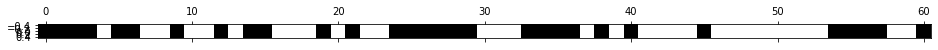

In [10]:
%matplotlib inline
masked_feaures_ftest = select.get_support()
print(masked_feaures_ftest)
plt.matshow(masked_feaures_ftest.reshape(1,-1), cmap='gray_r')

In [27]:
print("Total number of features selected via f-test : " + str((masked_feaures_ftest==True).sum()) )

Total number of features selected via f-test : 30


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.99, random_state=43)
print(X_train.shape)

(9617, 61)


In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

In [13]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(knn, 
           k_features=20, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs11 = sfs1.fit(X_train.as_matrix(), y1_train.as_matrix())
sfs11.k_feature_idx_

C:\Users\HP\Anaconda\envs\MachineLearning\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:  1.0min finished

[2020-10-04 22:18:39] Features: 1/20 -- score: 0.6980347301653322[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   48.4s finished

[2020-10-04 22:19:28] Features: 2/20 -- score: 0.7308932099407299[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(

(3, 5, 6, 17, 21, 22, 23, 25, 26, 27, 32, 33, 34, 36, 37, 38, 42, 44, 46, 51)

[0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


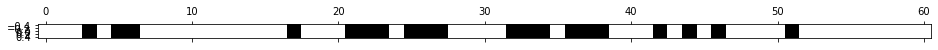

In [14]:
vals = np.array(sfs11.k_feature_idx_)
masked_feaures_sfs = np.zeros(61)
for i in vals:
    masked_feaures_sfs[i]=1
print(masked_feaures_sfs)
plt.matshow(masked_feaures_sfs.reshape(1,-1), cmap='gray_r')

In [28]:
print("Total number of features selected via SFS : " + str((masked_feaures_sfs==True).sum()) )

Total number of features selected via SFS : 20


In [15]:
sfs2 = SFS(knn, 
           k_features=20, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs21 = sfs2.fit(X_train.as_matrix(), y1_train.as_matrix())
sfs21.k_feature_idx_

C:\Users\HP\Anaconda\envs\MachineLearning\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:  1.2min finished

[2020-10-04 22:37:07] Features: 60/20 -- score: 0.6176562337527295[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   50.9s finished

[2020-10-04 22:37:58] Features: 59/20 -- score: 0.6177602162836644[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  59 out of 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   24.5s finished

[2020-10-04 22:54:29] Features: 33/20 -- score: 0.6178641988145992[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   23.8s finished

[2020-10-04 22:54:52] Features: 32/20 -- score: 0.6178641988145992[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:   23.0s finished

[2020-10-04 22:55:16] Features: 31/20 -- score: 0.617968181345534[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 

(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 22, 38)

[1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


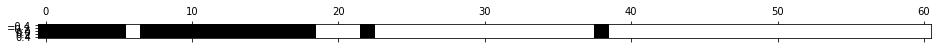

In [16]:
vals1 = np.array(sfs21.k_feature_idx_)
masked_feaures_sbs = np.zeros(61)
for i in vals1:
    masked_feaures_sbs[i]=1
print(masked_feaures_sbs)
plt.matshow(masked_feaures_sbs.reshape(1,-1), cmap='gray_r')

In [29]:
print("Total number of features selected via SBS : " + str((masked_feaures_sbs==True).sum()) )

Total number of features selected via SBS : 20


[False False False  True False  True  True False False False False False
 False False False False False False False False False  True False False
 False  True  True  True False False False False False  True  True False
  True False  True False False False False False False False False False
 False False False False False False False False False False False False
 False]


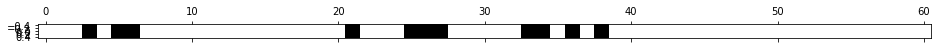

In [19]:
masked_features_intersect_1 = np.logical_and(masked_feaures_ftest,masked_feaures_sfs)
print(masked_features_intersect_1)
plt.matshow(masked_features_intersect_1.reshape(1,-1), cmap = 'gray_r')

[ True  True  True  True False  True False False False  True False False
  True False  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False]


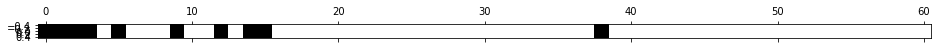

In [21]:
masked_features_intersect_2 = np.logical_and(masked_feaures_ftest,masked_feaures_sbs)
print(masked_features_intersect_2)
plt.matshow(masked_features_intersect_2.reshape(1,-1), cmap = 'gray_r')

In [20]:
print("Total number of features selected via SBS : " + str((masked_features_intersect_1==True).sum()) )

11


In [22]:
print("Total number of features selected via SBS : " + str((masked_features_intersect_2==True).sum()) )

10


[ True  True  True  True False  True  True False False  True False False
  True False  True  True False False False False False  True False False
 False  True  True  True False False False False False  True  True False
  True False  True False False False False False False False False False
 False False False False False False False False False False False False
 False]


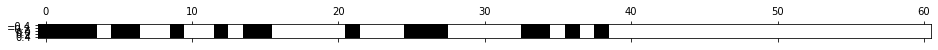

In [24]:
masked_features_final = np.logical_or(masked_features_intersect_1,masked_features_intersect_2)
print(masked_features_final)
plt.matshow(masked_features_final.reshape(1,-1), cmap = 'gray_r')

In [25]:
print((masked_features_final==True).sum())

18
